In [1]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy 
import isi_a
import isi_b
import isi_I
import isi_tau

WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]


[0.0436 0.0619 0.0809 0.1006 0.1211 0.1424 0.1647 0.188  0.2125 0.2382
 0.2654 0.2941 0.3246 0.357  0.3916 0.4285 0.4679 0.5099 0.5545 0.6015
 0.6505 0.7012 0.7531 0.8058 0.8591 0.9127 0.9665 1.0205 1.0745 1.1286
 1.1827 1.2368 1.2909 1.345  1.3991 1.4532 1.5073 1.5614 1.6155 1.6696
 1.7237 1.7778 1.8319 1.886  1.9401 1.9942 2.0483 2.1024 2.1565 2.2106
 2.2647 2.3188 2.3729 2.427  2.4811 2.5352 2.5893 2.6434 2.6975 2.7516
 2.8057 2.8598 2.9139 2.968  3.0221 3.0762 3.1303 3.1844 3.2385 3.2926
 3.3467 3.4008 3.4549 3.509  3.5631 3.6172 3.6713 3.7254 3.7795 3.8336
 3.8877 3.9418 3.9959] s
[0.0436 0.0622 0.0817 0.1022 0.1239 0.1471 0.1719 0.1987 0.228  0.2603
 0.2964 0.3375 0.3851 0.4408 0.5051 0.5749 0.6461 0.7174 0.7887 0.86
 0.9313 1.0026 1.0739 1.1452 1.2165 1.2878 1.3591 1.4304 1.5017 1.573
 1.6443 1.7156 1.7869 1.8582 1.9295 2.0008 2.0721 2.1434 2.2147 2.286
 2.3573 2.4286 2.4999 2.5712 2.6425 2.7138 2.7851 2.8564 2.9277 2.999
 3.0703 3.1416 3.2129 3.2842 3.3555 3.4268 3.4981 3.5694 

# **CONTROL**

In [2]:
# Original Variables


parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}


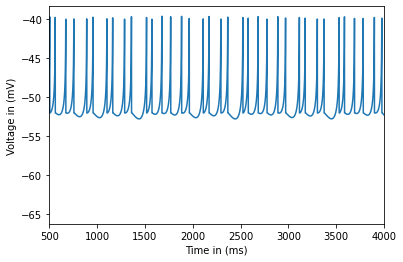

In [3]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
train = SpikeMonitor(neuron,record=True)
run(4000 * ms)

# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')
# print(train.spike_trains())
difference  = numpy.diff(train.spike_trains()[0])
# print(difference)
plt.show()

# **Variating the injected current**

### $0,1nA$  

In [4]:
start_scope()
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

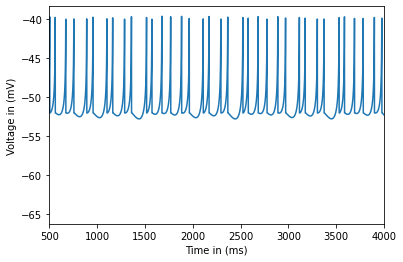

<Figure size 720x576 with 0 Axes>

In [5]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
# plt.xlim(500,1000)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')
plt.figure(figsize=(10,8))
# 
plt.show()

### $0.5 nA$

In [6]:
start_scope()
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .150*nA,
}

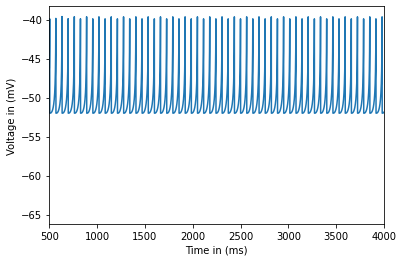

In [7]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
# plt.xlim(500,1000)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')
# plt.figure(figsize=(10,8))
# 
plt.show()

### $1nA$

In [8]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": 0.250*nA,
}

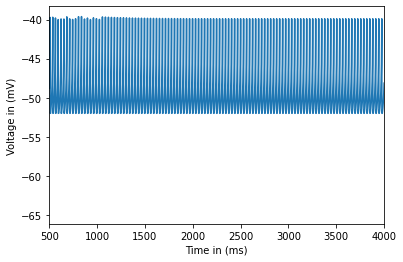

In [9]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $5 nA$

In [10]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": 0.150*nA,
}

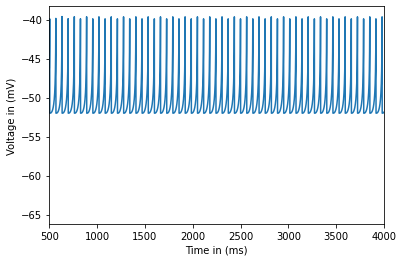

In [11]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $10 nA$

In [12]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": 0.08*nA,
}

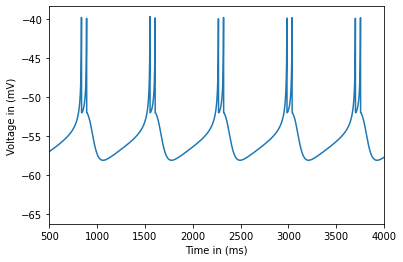

In [13]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### **Change in interspike interval ($s$) with variation of injected current $I$**

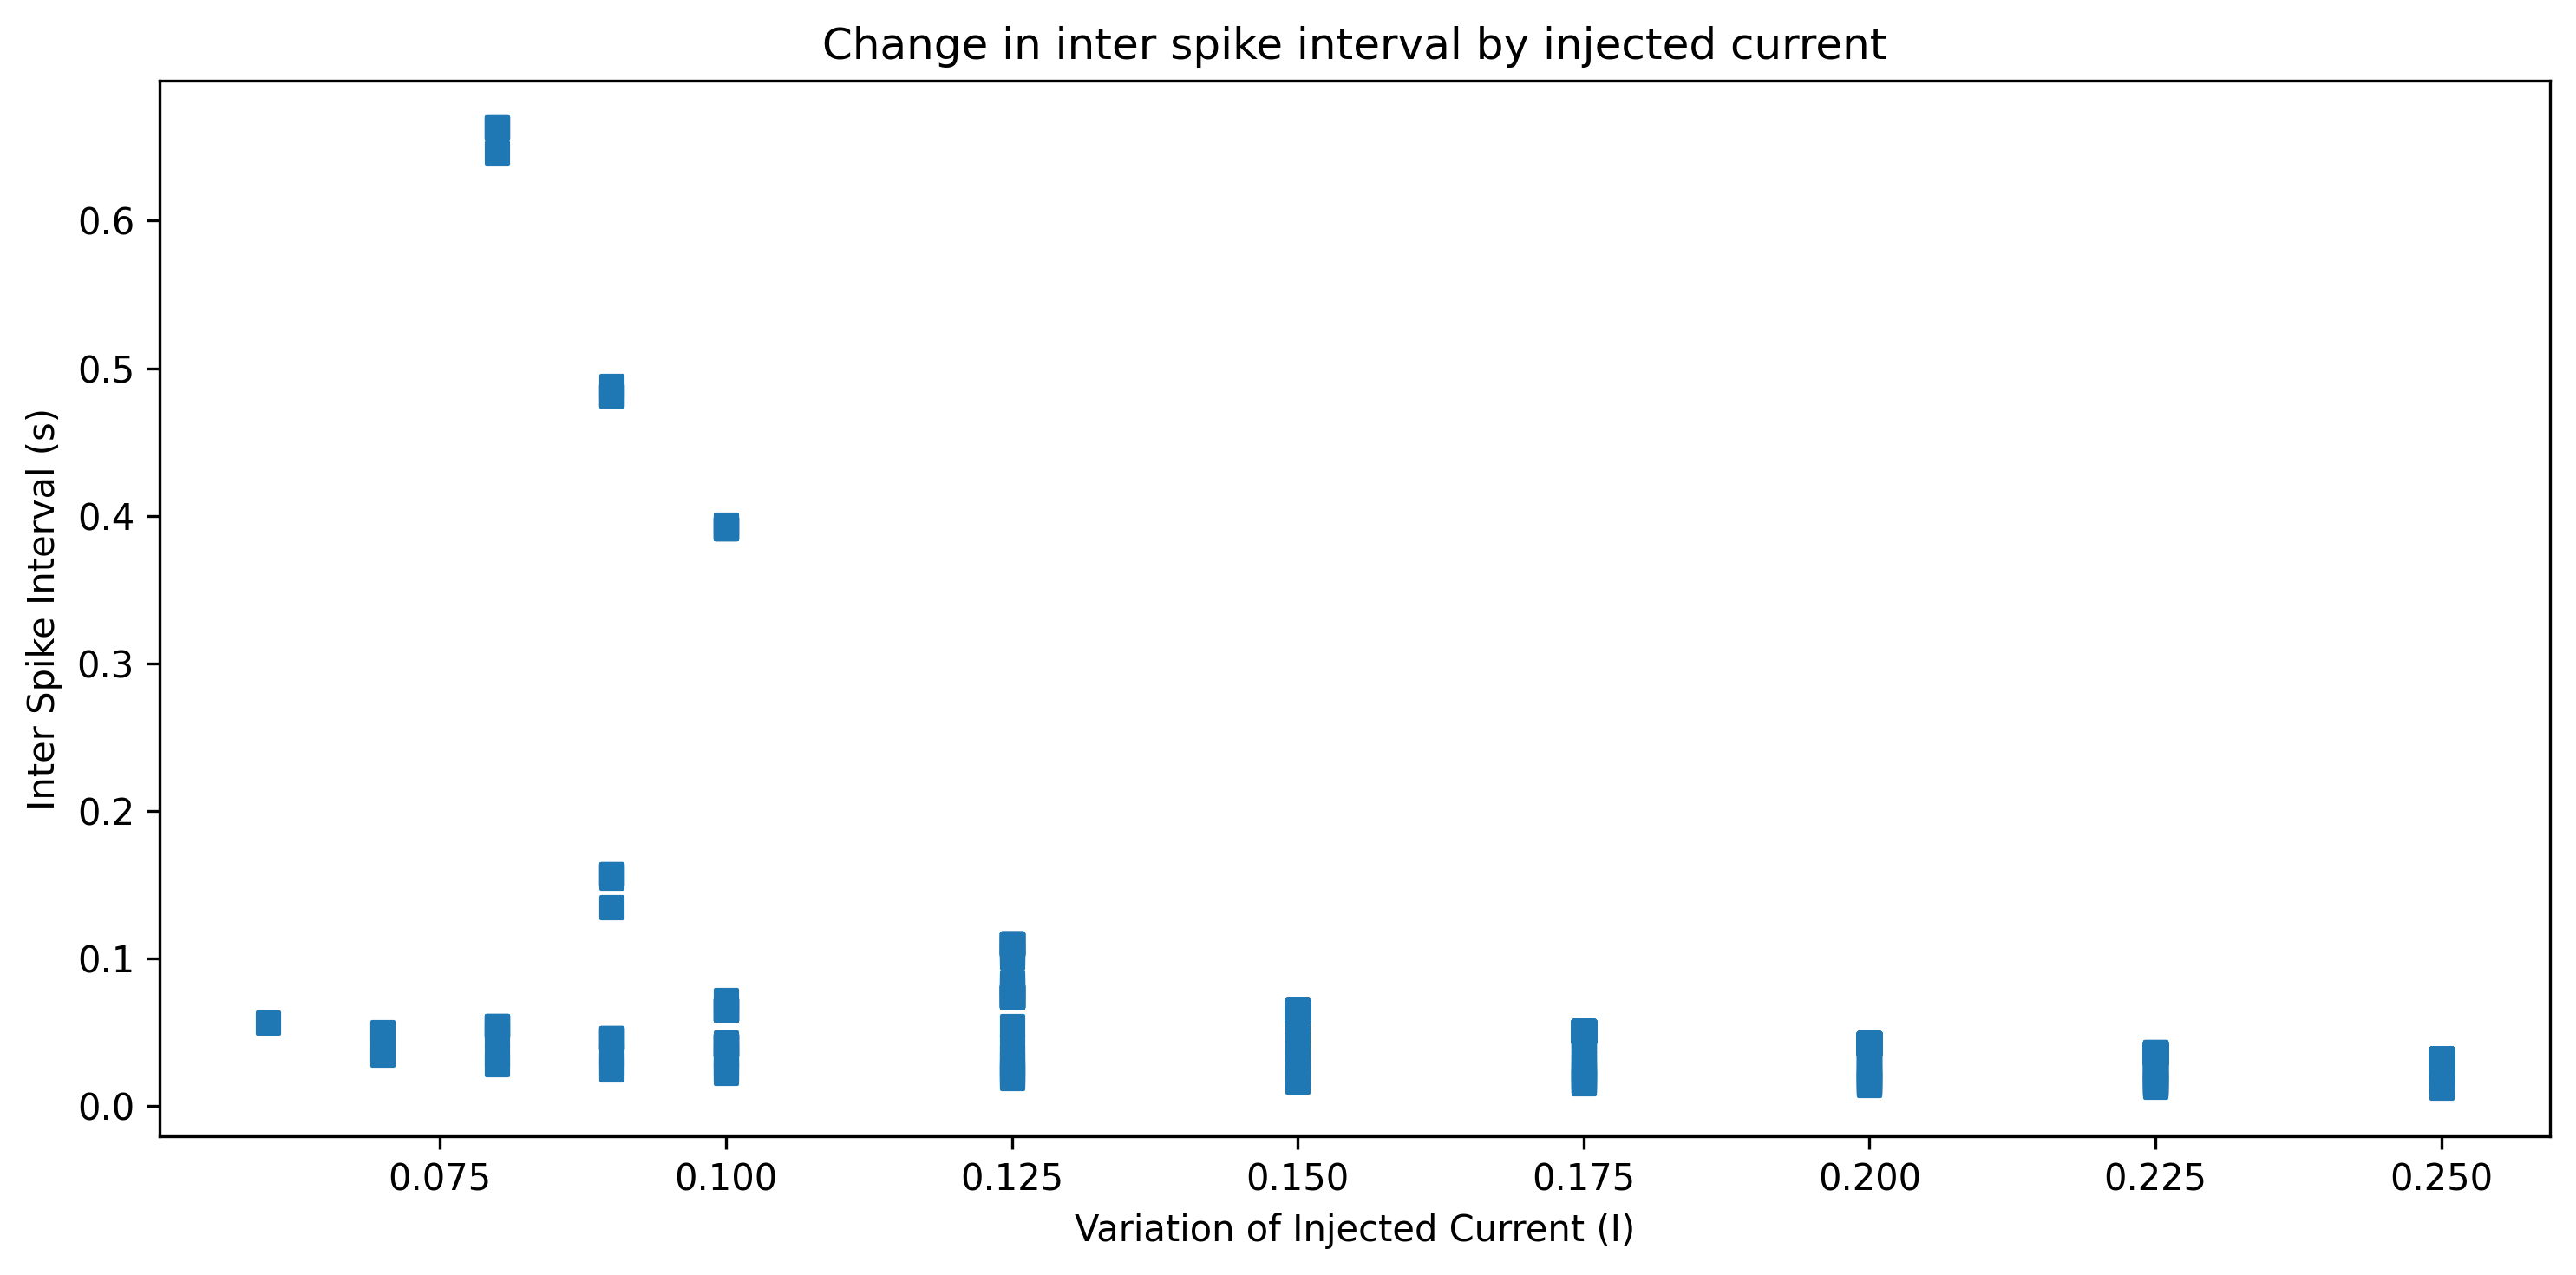

In [14]:
isi_I.I_plt(isi_I.df)

# **Variating values of $a$**

### $1nS$

In [15]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 1.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

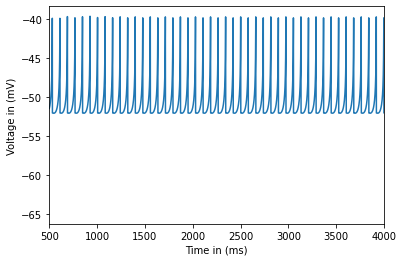

In [16]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=100)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $2nS$

In [17]:

parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

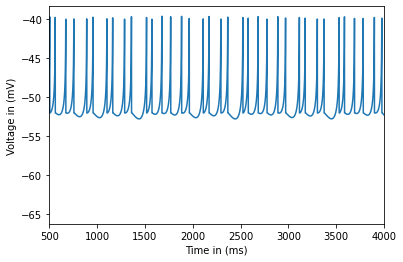

In [18]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $5nS$

In [19]:

parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 6.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

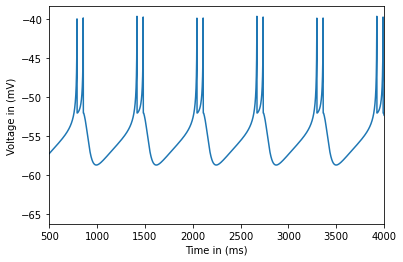

In [20]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $10nS$

In [21]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a":4.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

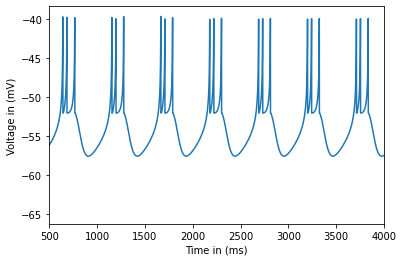

In [22]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### **Change in interspike interval ($s$) with variation of $a$**

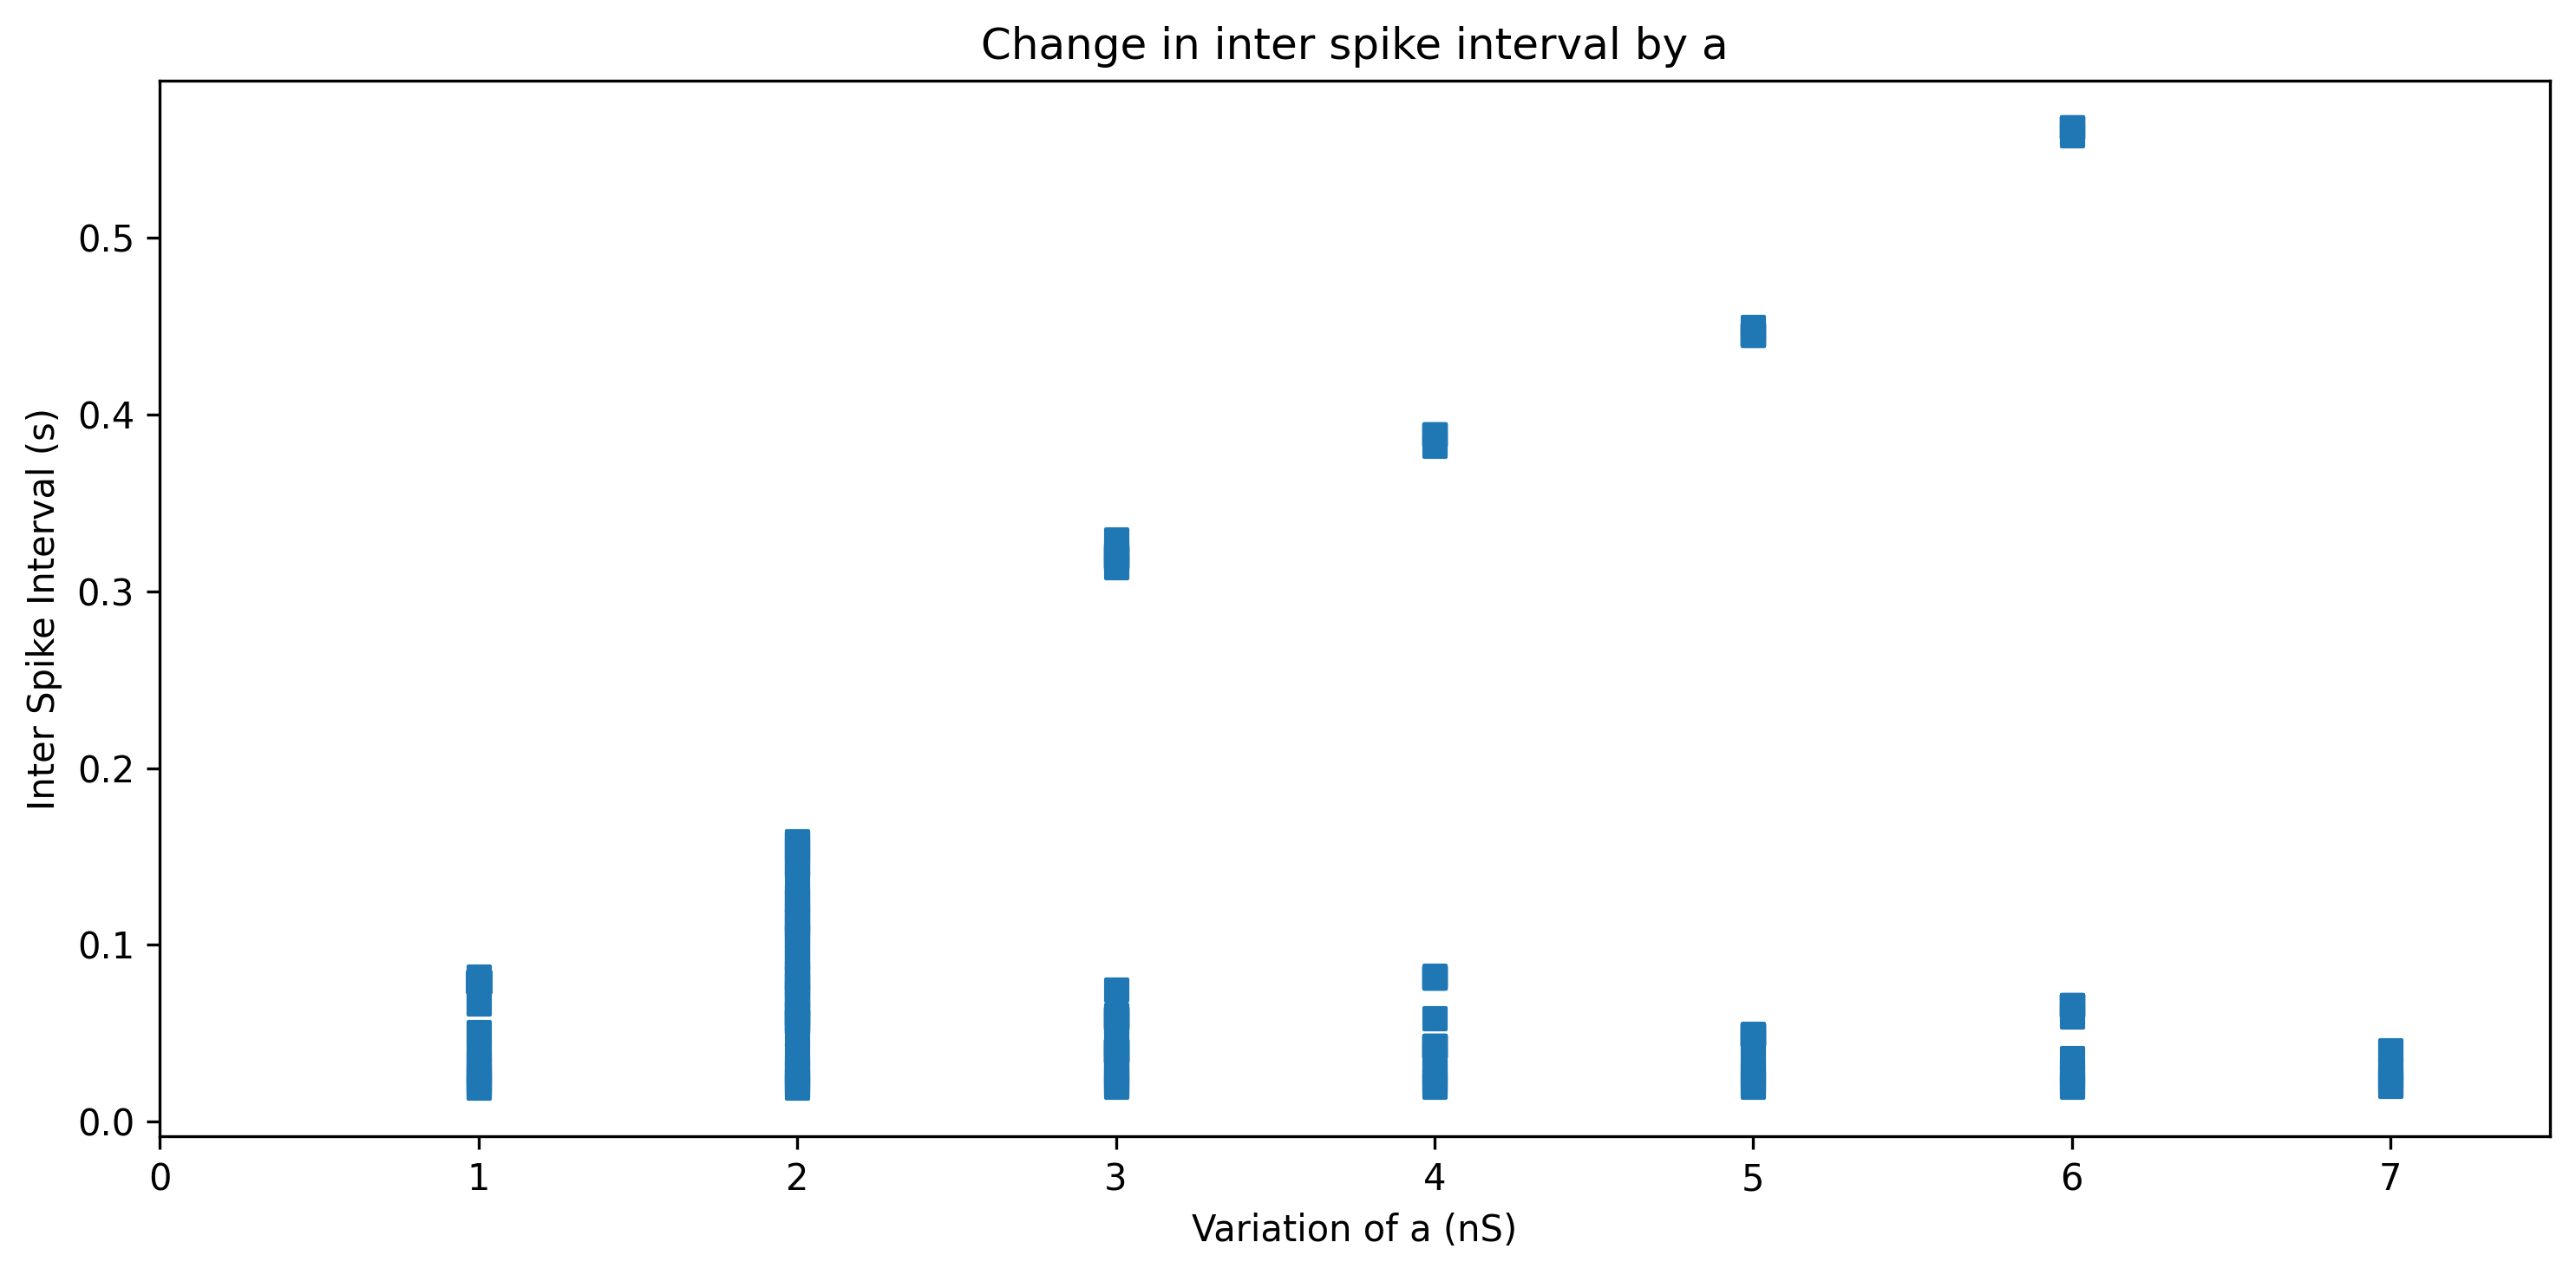

In [23]:
isi_a.a_plt(isi_a.df)

## **Variating the value of $b$**

### $1pA$

In [24]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 1*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

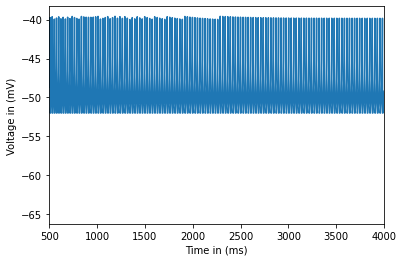

In [25]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $5pA$

In [26]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 1.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

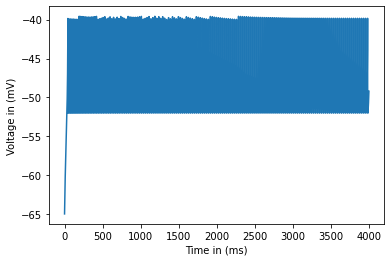

In [27]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### Control $10pA$

In [28]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 7.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

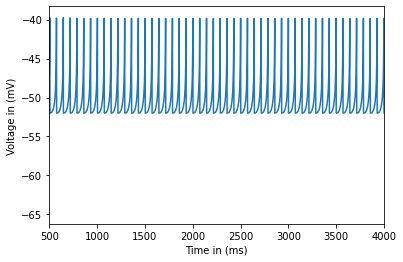

In [29]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $15pA$

In [30]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 17.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

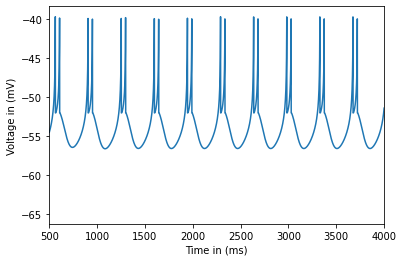

In [31]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $20pA$

In [32]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 27.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

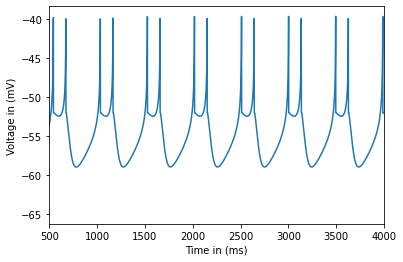

In [33]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)
plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### **Change in interspike interval ($s$) with variation of $b$**

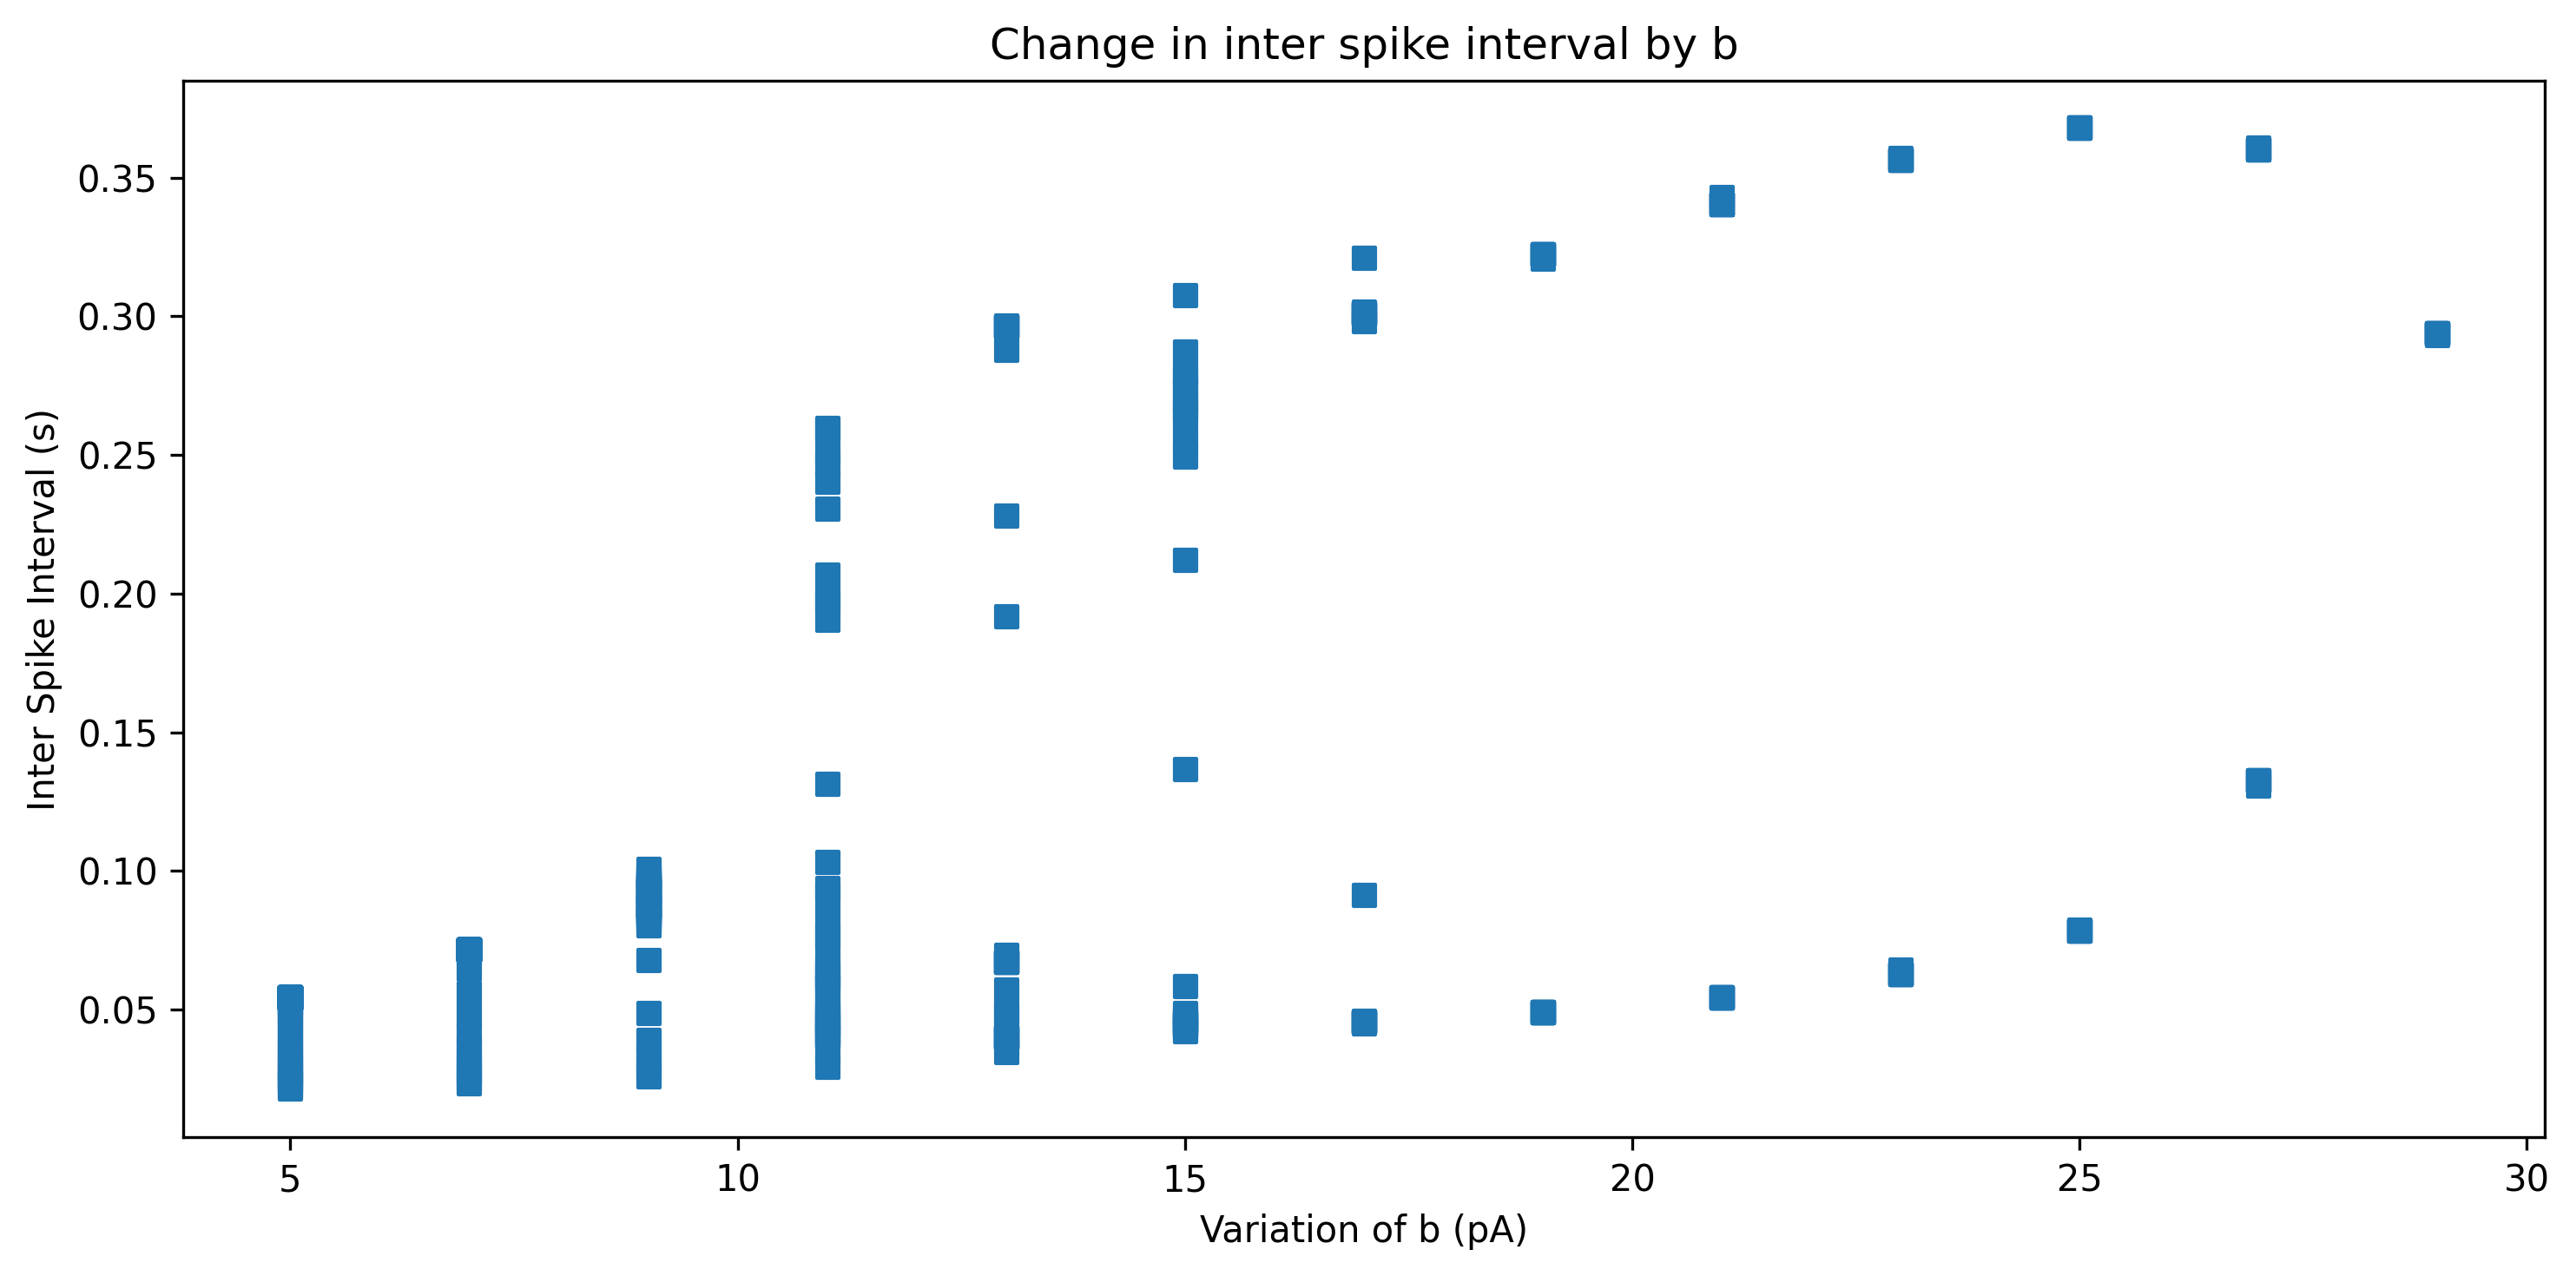

In [34]:
isi_b.b_plt(isi_b.df)

# **Variating values $tau$**

### $200ms$

In [35]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 200.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

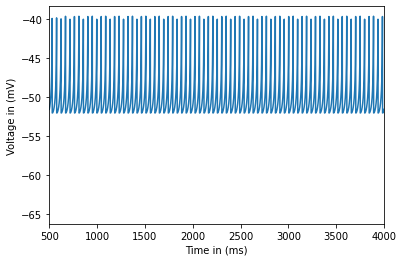

In [36]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $300ms$

In [37]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 300.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

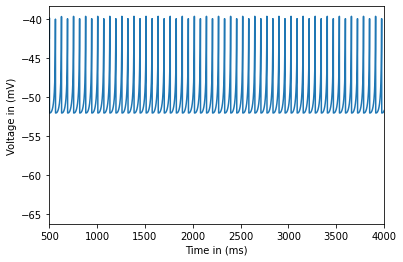

In [38]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $400ms$

In [39]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 400.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

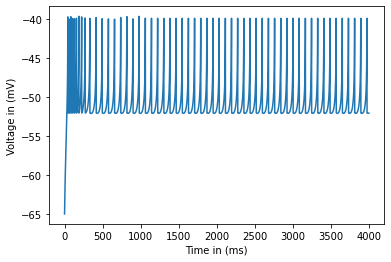

In [40]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $500ms$

In [41]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 500.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

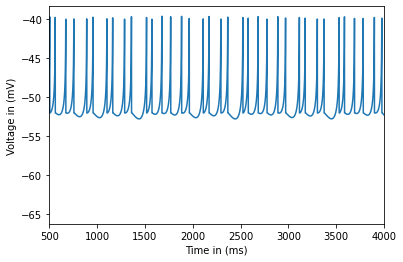

In [42]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $600ms$

In [43]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 600.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

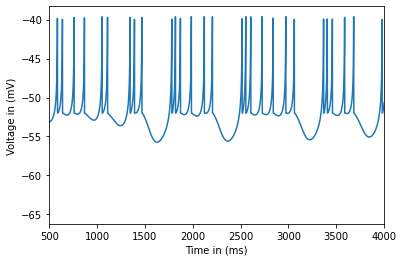

In [44]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $700ms$

In [45]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 700.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

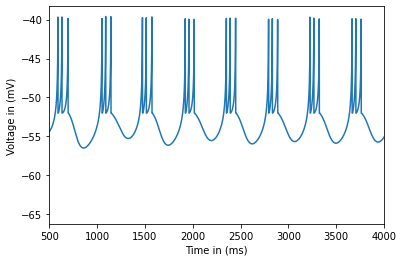

In [46]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $800ms$

In [47]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 800.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

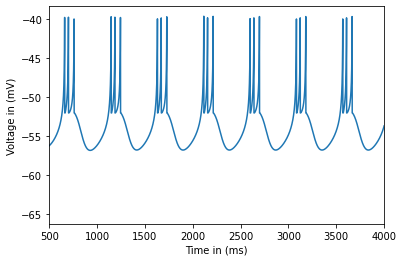

In [48]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)
# plt.xlim(0,500)
plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### $1000ms$

In [49]:
parameters = {
    "c_m": 200 * pF,
    "g_l": 10.*nS,
    "e_l": -65.*mV,
    "v_t": -55.*mV,
    "d_t": 5.0*mV,
    "a": 2.0 * nS,
    "tau_w": 1000.0*ms,
    "b": 10.0*pA,
    "v_r": -52*mV,
    "i_stim": .120*nA,
}

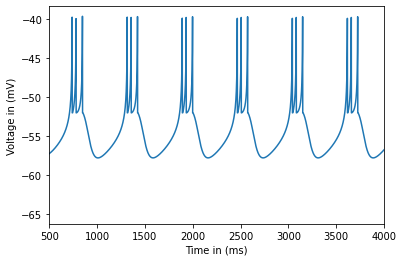

In [50]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt (unless refractory)
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -40.*mV", 
    reset="vm = v_r; w += b",
    refractory='5*ms',
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(4000 * ms)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)
plt.xlim(500,4000)

plt.xlabel('Time in (ms)')
plt.ylabel('Voltage in (mV)')

plt.show()

### **Change in interspike interval ($s$) with variation of tau ($ms$)**

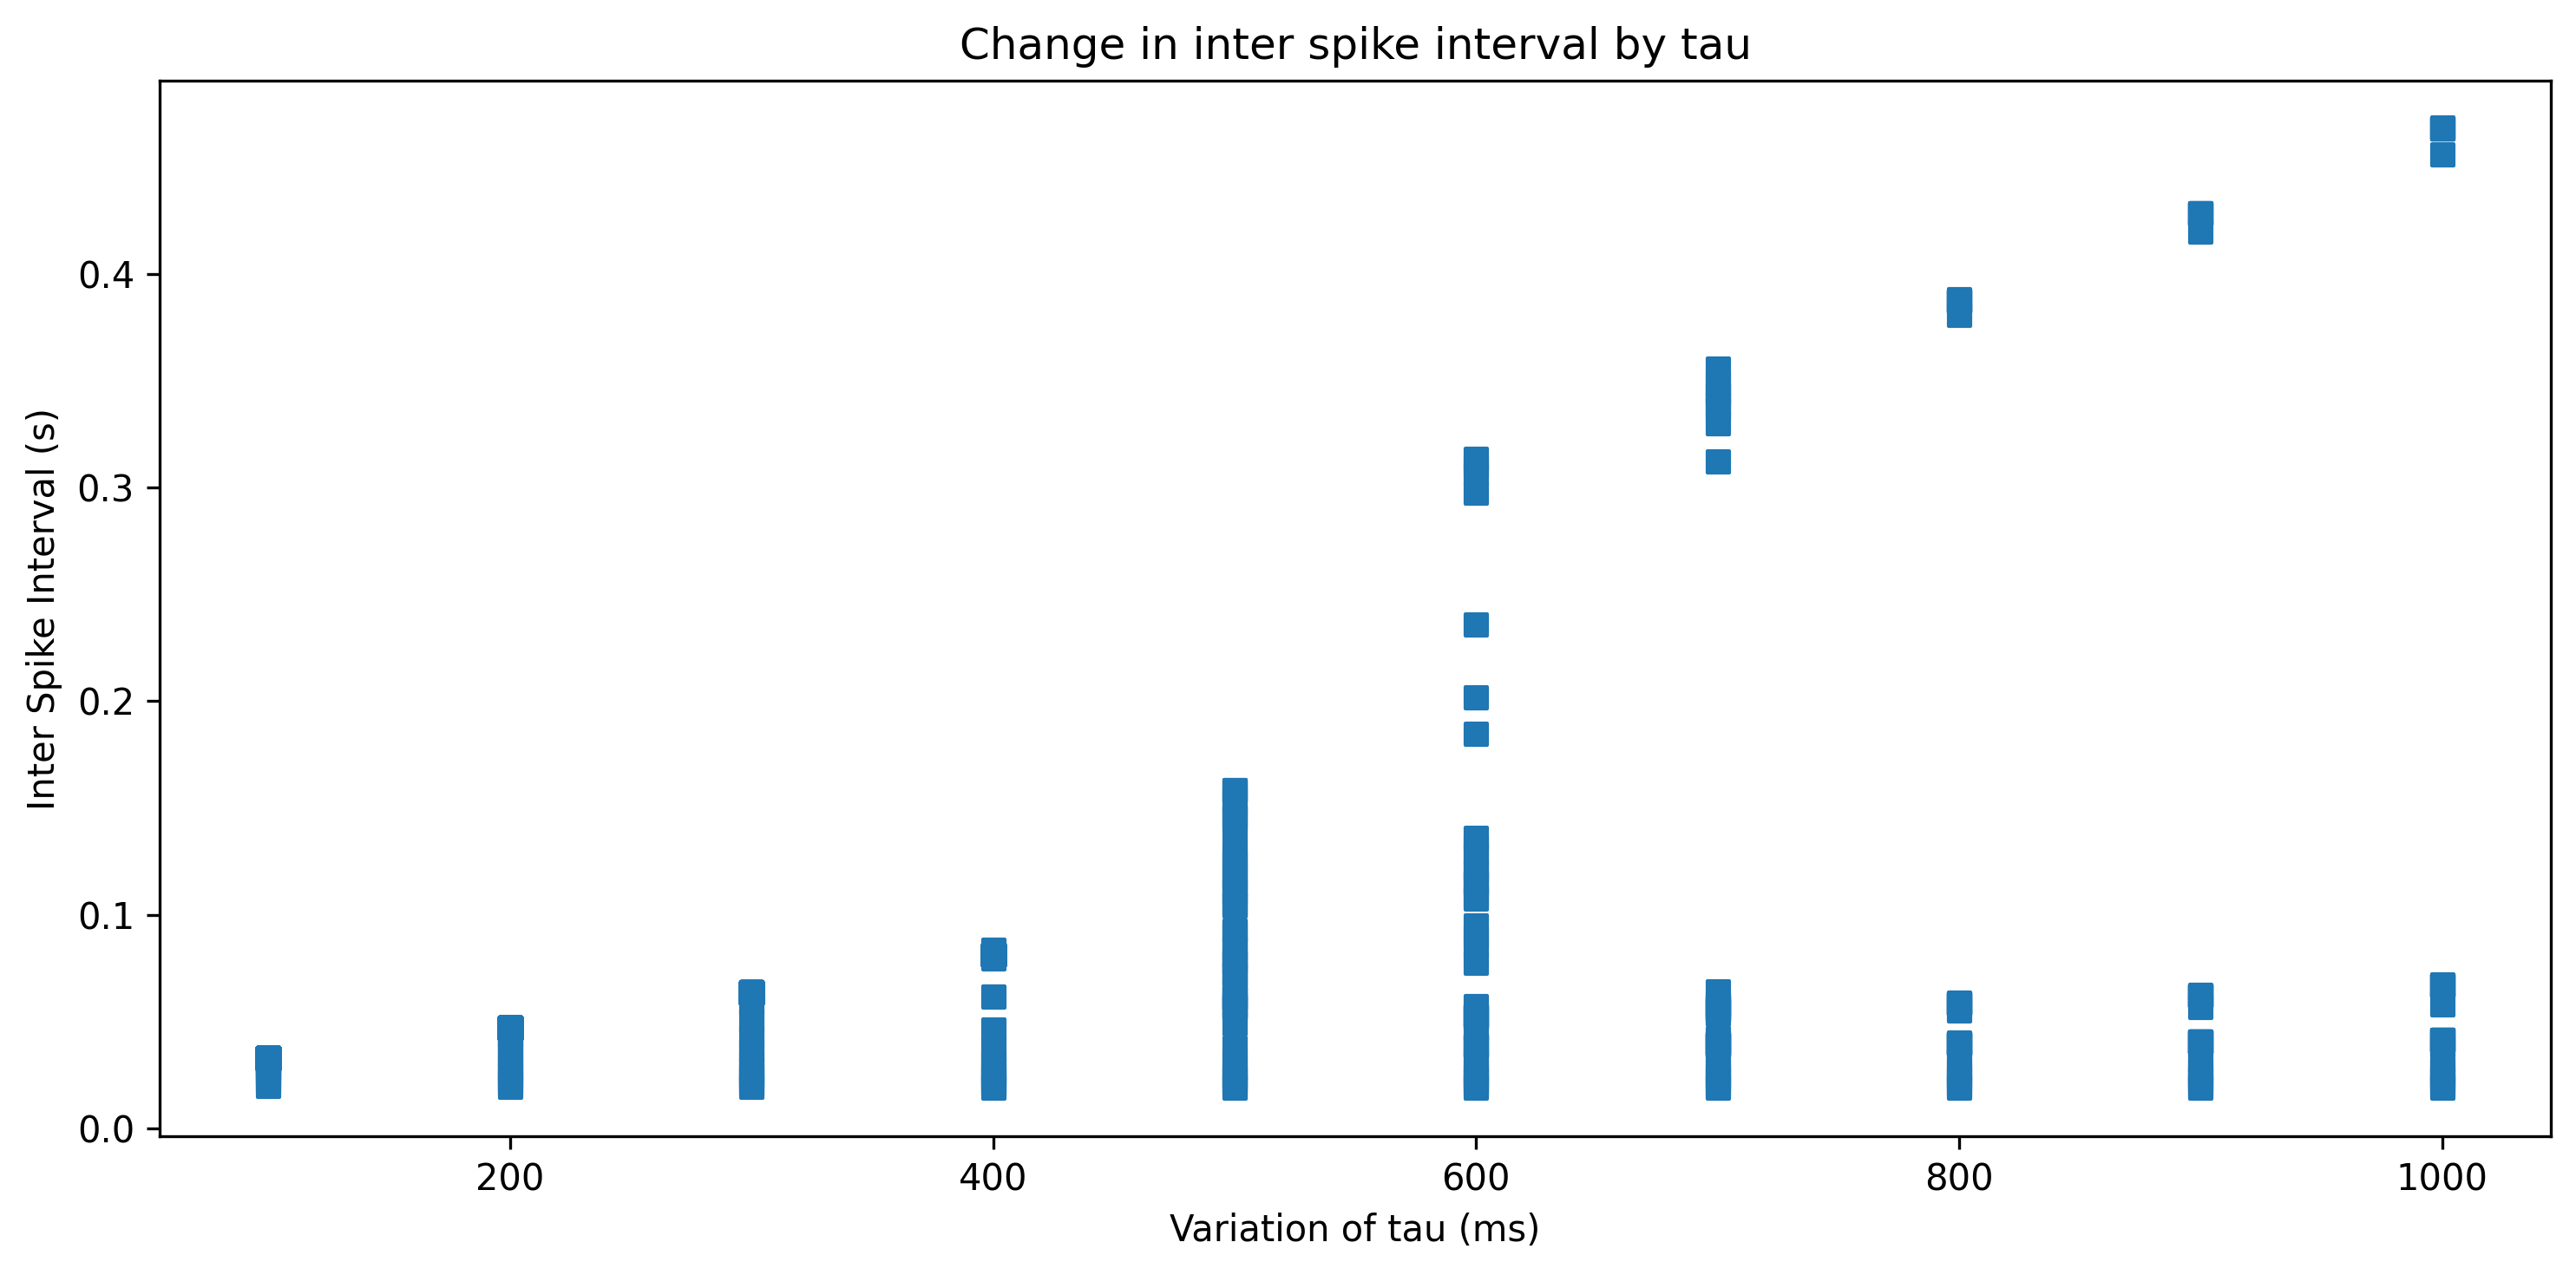

In [51]:
isi_tau.tau_plt(isi_tau.df)